In [ ]:
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import rarfile

In [ ]:
rar_file_path = 'sample_data/african_climate_change_data.rar'  # Specify the path to your RAR file
extract_path = 'sample_data'  # Specify the path to extract the files from the RAR

with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    rar_ref.extractall(extract_path)

In [ ]:
df = pd.read_csv('sample_data/african_climate_change_data.csv')
df.head()

,created_utc,body
0,2017-05-15 23:56:50,i'll start off by saying that i agree that cli...
1,2017-05-15 21:57:39,lots of possible reasons...\n\n1. we out-compe...
2,2017-05-15 21:38:27,"well 150 years ago, currencies were valued qui..."
3,2017-05-15 21:19:36,you say that even as the evidence to the contr...
4,2017-05-15 21:15:07,"&gt; savages, non-civilized peoples so africa,..."


In [ ]:
df.tail()

,created_utc,body
72849,2016-09-16 11:07:53,"1. hmm, that's a good question. tethys sea cam..."
72850,2016-09-16 07:20:41,if the borders would be closed right now i wou...
72851,2016-09-16 06:11:20,"in my original post, i focused on more familia..."
72852,2016-09-16 02:56:16,because hominids were native and africa and as...
72853,2016-09-16 01:03:31,the idea that mammals are superior to other ve...


In [ ]:
#Convert created_at column to datetime and rename to Date
df['Date'] = pd.to_datetime(df['created_utc'])

In [ ]:
df.describe()

<ipython-input-25-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,created_utc,body,Date
count,72854,72854,72854
unique,72836,70638,72836
top,2016-12-15 18:03:00,"biden is against single payer, against medicar...",2016-12-15 18:03:00
freq,3,311,3
first,NaN,NaN,2013-01-01 02:26:13
last,NaN,NaN,2023-04-13 03:02:36


In [ ]:
# Filter DataFrame to the desired date range
start_date = pd.to_datetime('2013-01-01 02:26:13')
end_date = pd.to_datetime('2023-04-13 03:02:36')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [ ]:
event_dates = {
    pd.to_datetime('2016-11-07'): 'United Nations Climate Change Conference (COP22)',
    pd.to_datetime('2016-05-01'): 'Drought in Eastern and Southern Africa',
    pd.to_datetime('2017-01-01'): 'Cape Town Water Crisis',
    pd.to_datetime('2014-03-25'): 'Floods in Nigeria',
    pd.to_datetime('2013-09-05'): 'Bushfires in Australia',
    pd.to_datetime('2018-07-10'): 'Heatwave in Europe',
    pd.to_datetime('2013-02-14'): 'Cyclone Haruna in Madagascar',
    pd.to_datetime('2019-11-20'): 'Amazon Rainforest Fires',
    pd.to_datetime('2015-06-29'): 'Heatwave in India',
    pd.to_datetime('2018-02-17'): 'Cyclone Gita in Tonga',
    pd.to_datetime('2019-03-15'): 'Cyclone Idai in Mozambique',
    pd.to_datetime('2017-12-04'): 'Wildfires in California',
    pd.to_datetime('2014-05-20'): 'Floods in Bosnia and Herzegovina',
    pd.to_datetime('2016-09-16'): 'Hurricane Matthew in the Caribbean',
    pd.to_datetime('2017-07-12'): 'Famine in South Sudan',
    pd.to_datetime('2015-08-29'): 'Hurricane Katrina Anniversary',
    pd.to_datetime('2019-04-21'): 'Easter Sunday Attacks in Sri Lanka',
    pd.to_datetime('2018-05-27'): 'Flooding in Ellicott City, Maryland',
    pd.to_datetime('2015-12-12'): 'Paris Agreement Signing',
    pd.to_datetime('2014-07-23'): 'Ebola Outbreak in West Africa',
    pd.to_datetime('2017-05-12'): 'WannaCry Ransomware Attack',
    pd.to_datetime('2019-09-20'): 'Global Climate Strike',
    pd.to_datetime('2013-06-20'): 'Flooding in Calgary, Canada',
    pd.to_datetime('2016-03-22'): 'Brussels Bombings',
    pd.to_datetime('2014-01-09'): 'Polar Vortex in North America',
    pd.to_datetime('2017-03-22'): 'Westminster Attack in London',
    pd.to_datetime('2018-10-07'): 'IPCC Special Report on Global Warming',
    pd.to_datetime('2019-05-12'): 'Cyclone Fani in India',
    pd.to_datetime('2015-11-30'): 'COP21 Paris Climate Conference',
    pd.to_datetime('2016-08-14'): 'Louisiana Floods',
    pd.to_datetime('2017-11-24'): 'Black Friday',
    pd.to_datetime('2018-03-04'): 'Cyclone Hola in Vanuatu',
    pd.to_datetime('2019-07-15'): 'Hottest Day on Record in Europe',
    pd.to_datetime('2015-02-26'): 'Color of the Dress Debate',
    pd.to_datetime('2013-12-05'): 'Typhoon Haiyan in the Philippines',
    pd.to_datetime('2016-01-16'): 'Blizzard in the Eastern United States',
    pd.to_datetime('2017-08-25'): 'Hurricane Harvey in Texas',
    pd.to_datetime('2018-12-14'): 'Yellow Vest Protests in France',
    pd.to_datetime('2019-02-14'): 'Pulwama Attack in Kashmir',
    pd.to_datetime('2015-04-25'): 'Nepal Earthquake',
    pd.to_datetime('2016-07-14'): 'Bastille Day Attack in Nice, France',
    pd.to_datetime('2017-10-01'): 'Las Vegas Shooting',
    pd.to_datetime('2018-06-01'): 'Volcanic Eruption in Guatemala',
    pd.to_datetime('2019-06-16'): 'Hong Kong Anti-Extradition Protests',
    pd.to_datetime('2013-04-24'): 'Rana Plaza Building Collapse',
    pd.to_datetime('2016-02-02'): 'Zika Virus Outbreak',
    pd.to_datetime('2017-09-19'): 'Mexico Earthquake',
    pd.to_datetime('2018-11-11'): 'Centenary of Armistice Day',
    pd.to_datetime('2019-01-04'): 'Extreme Cold in the Midwest',
    pd.to_datetime('2015-03-24'): 'Germanwings Flight 9525 Crash',
    pd.to_datetime('2016-10-21'): 'Wikileaks Releases Hillary Clinton Emails',
    pd.to_datetime('2017-06-08'): 'UK General Election',
    pd.to_datetime('2018-09-28'): 'Indonesia Earthquake and Tsunami',
    pd.to_datetime('2019-08-03'): 'Mass Shooting in El Paso, Texas',
    pd.to_datetime('2015-10-31'): 'Russian Metrojet Flight 9268 Crash',
}


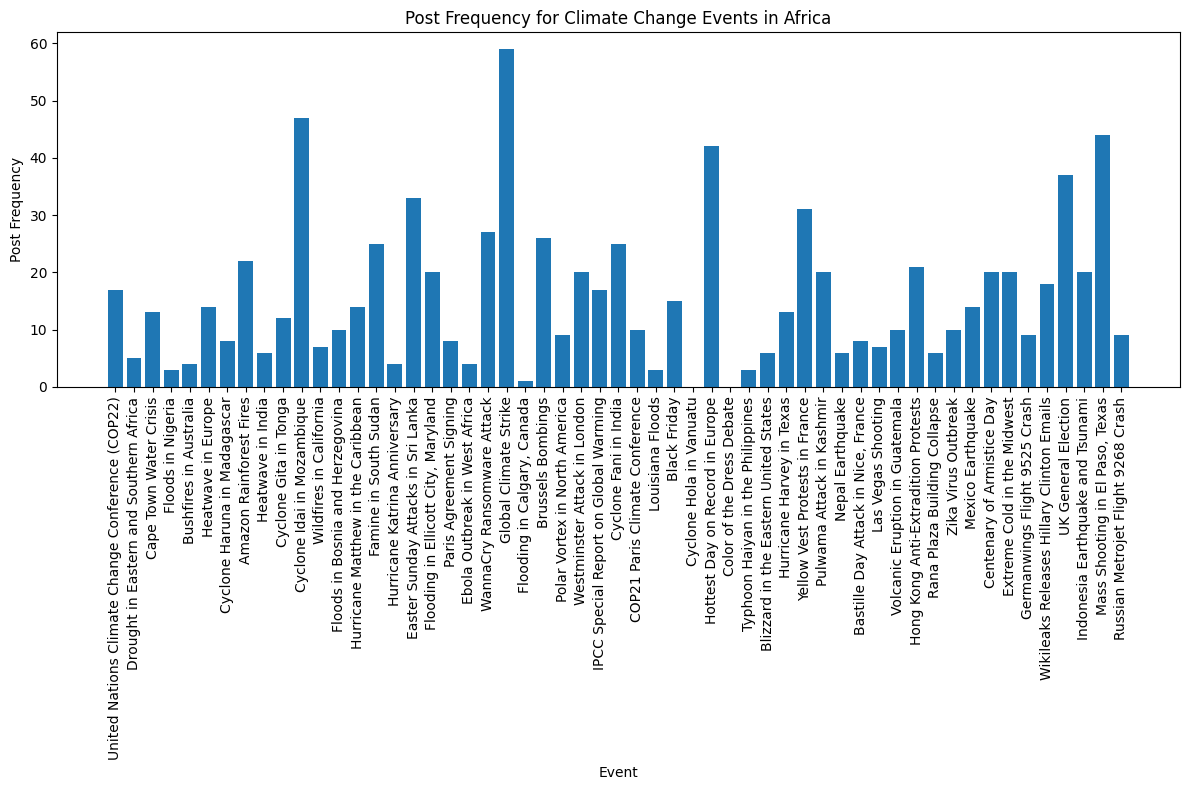

In [ ]:
# Count the occurrences of each event within the corresponding event dates
event_counts = [filtered_df[(filtered_df['Date'].dt.date == date.date())].shape[0] for date in event_dates.keys()]

# Create a bar chart of post frequency per event date

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the bar
plt.bar(range(len(event_dates)), event_counts, tick_label=[event_dates[date] for date in event_dates.keys()], align='center')
plt.xlabel('Events')
plt.ylabel('Post Frequency')
plt.title('Post Frequency for Climate Change Events in Africa from 2013 to 2023')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Below is the corresponding line plot in case you're interested

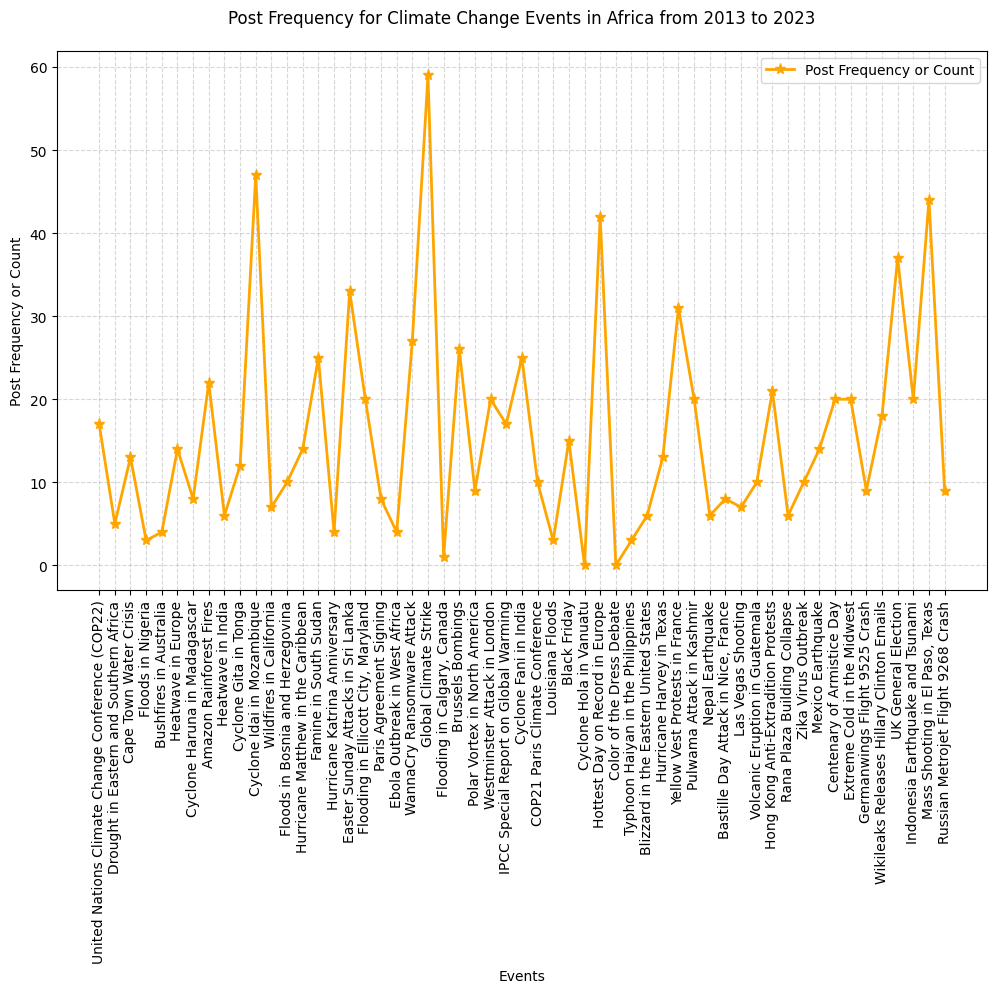

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 7))


# Create a line chart of post frequency per event date with blue lines and red markers
plt.plot(range(len(event_counts)), event_counts, marker='*', color='orange', linestyle='-', linewidth=2, markersize=8)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend(['Post Frequency or Count'])

# Customize axes labels
plt.xlabel('Events')
plt.ylabel('Post Frequency or Count')

# Set a title and adjust the position
plt.title('Post Frequency for Climate Change Events in Africa from 2013 to 2023', pad=20)

# Rotate the x-axis labels for better readability
plt.xticks(range(len(event_dates)), [event_dates[date] for date in event_dates.keys()], rotation=90)

# Display the plot
plt.show()
